In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [3]:
def wordCount(text):
        # convert to lower case and strip regex\n",
        try:
             # convert to lower case and strip regex\n",
            text = text.lower()
            regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\\\r\\\\t\\\\n]')
            txt = regex.sub(" ", text)
            # tokenize\n",
            # words = nltk.word_tokenize(clean_txt)\n",
            # remove words in stop words\n",
            words = [w for w in txt.split(" ")
                     if not w in stop_words.ENGLISH_STOP_WORDS and len(w)>3]
            return len(words)
        except:
            return 0

In [4]:
"PATH = \"../input/\""
train = pd.read_csv('./inputCopy/train.tsv', sep='\t')
test = pd.read_csv('./inputCopy/test.tsv', sep='\t')

In [5]:
print('\n ************** Training data ***************')
print('\n (Rows, column)', train.shape)
print('\n ************** Test data ***************')
print(test.shape)
print('\n ************** Train data(data types) ***************')
print (train.dtypes)


 ************** Training data ***************

 (Rows, column) (1482535, 8)

 ************** Test data ***************
(693359, 7)

 ************** Train data(data types) ***************
train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object



 ************* Price(Target Variable) ***********
count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

 The median price of all the items in the training is about $267 but given the existence of some extreme values of over $100 and the maximum at $2,009, the distribution of the variables is heavily skewed to the left. So let's make log-transformation on the price (we added +1 to the value before the transformation to avoid zero and negative values


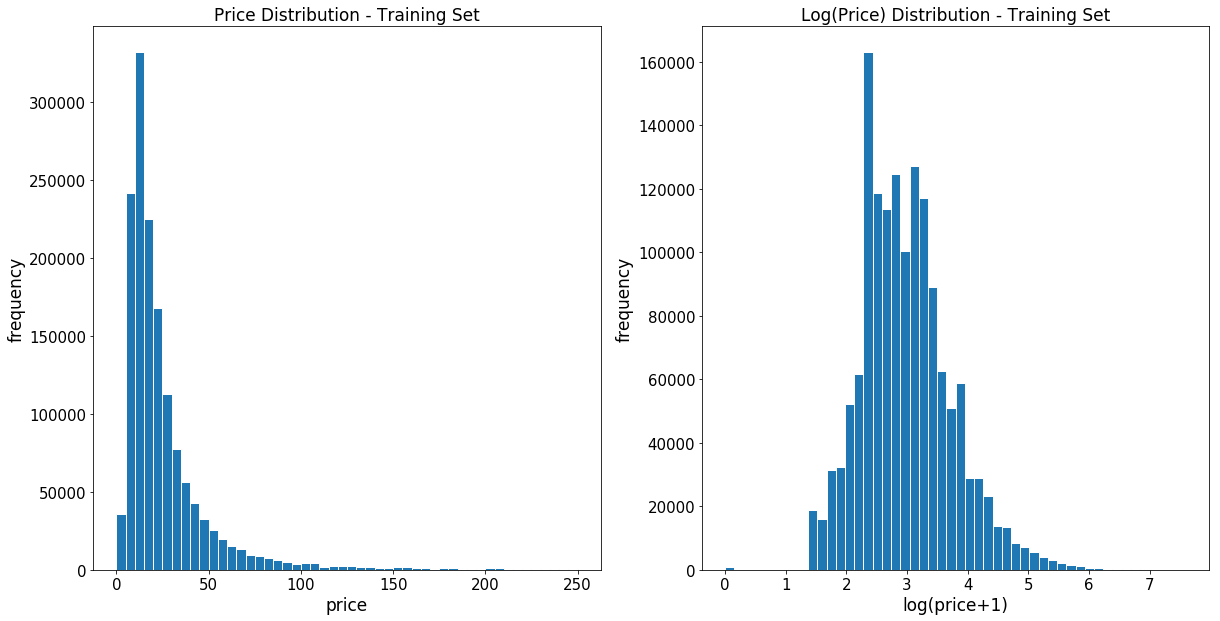

In [6]:
print('\n ************* Price(Target Variable) ***********')
print(train.price.describe())
print('\n The median price of all the items in the training is about $267 but given the existence of some extreme values of over $100 and the maximum at $2,009, the distribution of the variables is heavily skewed to the left. So let\'s make log-transformation on the price (we added +1 to the value before the transformation to avoid zero and negative values')
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250])
plt.xlabel('price', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)

plt.subplot(1, 2, 2)
np.log(train['price']+1).plot.hist(bins=50, figsize=(20,10), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Log(Price) Distribution - Training Set', fontsize=17)
plt.show()

In [7]:
print('\n ************* Shipping ***********')
print(train.shipping.value_counts()/len(train))
print('\nShipping cost burden is decently split, 55% by sellers and 44% by buyers')


 ************* Shipping ***********
0    0.552726
1    0.447274
Name: shipping, dtype: float64

Shipping cost burden is decently split, 55% by sellers and 44% by buyers


In [8]:
print('\n ************* Category Name ***********')
#print (train.category_name.value_counts()[:5])
print(train.category_name.describe())


 ************* Category Name ***********
count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object


In [9]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = \
zip(*train['category_name'].apply(lambda x: split_cat(x)))
print("There are %d unique categories." % train['general_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

x = train['general_cat'].value_counts().index.values.astype('str')
y = train['general_cat'].value_counts().values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))]
trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of Items by Main Category',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Category'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

x = train['subcat_1'].value_counts().index.values.astype('str')[:15]
y = train['subcat_1'].value_counts().values[:15]
pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))][:15]
trace1 = go.Bar(x=x, y=y, text=pct, marker=dict(color = y,colorscale='Portland',showscale=True,
            reversescale = False))
layout = dict(title= 'Number of Items by Sub Category (Top 15)',
              yaxis = dict(title='Count'),
              xaxis = dict(title='SubCategory'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

There are 11 unique categories.
There are 114 unique first sub-categories.
There are 871 unique second sub-categories.


In [10]:
print('\n ************* Category Name(Empty values) ***********')
print("There are %d items that do not have a label." % train['category_name'].isnull().sum())



 ************* Category Name(Empty values) ***********
There are 6327 items that do not have a label.


In [11]:
print('\n ************* Brand Name ***********')
print(train.brand_name.describe())
print("There are %d unique brand names in the training dataset." % train['brand_name'].nunique())
x = train['brand_name'].value_counts().index.values.astype('str')[:10]
y = train['brand_name'].value_counts().values[:10]
trace1 = go.Bar(x=x, y=y, marker=dict(color = y,colorscale='Portland',showscale=True,
                         reversescale = False))
layout = dict(title= 'Top 10 Brand by Number of Items',
           yaxis = dict(title='Brand Name'),
           xaxis = dict(title='Count'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)


 ************* Brand Name ***********
count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object
There are 4809 unique brand names in the training dataset.


In [12]:
print('\n ************* Item Description ***********')
train['desc_len'] = train['item_description'].apply(lambda x: wordCount(x))
test['desc_len'] = test['item_description'].apply(lambda x: wordCount(x))
#print(train.head())
df = train.groupby('desc_len')['price'].mean().reset_index()

trace1 = go.Scatter(
    x = df['desc_len'],
    y = np.log(df['price']+1),
    mode = 'lines+markers',
    name = 'lines+markers')
layout = dict(title= 'Average Log(Price) by Description Length',
              yaxis = dict(title='Average Log(Price)'),
              xaxis = dict(title='Description Length'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

# remove missing values in item description
train = train[pd.notnull(train['item_description'])]



 ************* Item Description ***********
